- Different NLP techniques were used to extract keywords from Starbucks coffee reviews.

- We utilized Yet Another Keyword Extractor (YAKE), KeyBERT, and a TF-IDF based approach to extract the top 5 keywords from the reviews.

- Using the Huggingface library, we extracted the emotions behind each review. It was observed that most of the reviews fell under the categories of anger and joy.

- Subsequently, with the help of WordCloud, the top words for each emotion were visualized. This method was implemented for the keywords extracted using YAKE, KeyBERT, and TF-IDF models.

# Importing the required libraries and Dataset

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
pd.set_option('display.max_columns', None)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
!pip install contractions
import contractions

Dataset: https://www.kaggle.com/datasets/harshalhonde/starbucks-reviews-dataset

In [3]:
# imporing the dataset

df = pd.read_csv('/content/reviews_data.csv')
df.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


In [4]:
# dimensions of data
df.shape

(850, 6)

In [5]:
# checking for null values
df.isnull().sum()

name             0
location         0
Date             0
Rating         145
Review           0
Image_Links      0
dtype: int64

In [6]:
df.head(2)

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']


In [7]:
df = df[['name','Rating', 'Review']]

Dataset contaings 145 null values in the Rating column, which is not much relevent

# Data Preprocessing

In [8]:
# createing the function for the text preprocessing

# using porterstemmer to identify root word
stemmer = PorterStemmer()

def text_preprocessing(text):
  text = contractions.fix(text) # converting can't to cannot
  text = re.sub(r'@\w+', '', text) # removing the @apple
  text = re.sub(r'http\S+', '', text) # removing the http
  text = re.sub(r"[^a-zA-Z]", " ", text) # removing the numbers
  text = text.lower().strip()
  text = word_tokenize(text)
  # text = [stemmer.stem(w) for w in text if not w in stopwords.words('english')]
  text = [token for token in text if len(token) >= 2] # any word which have length less than 2 removed
  text = [token for token in text if token not in ['starbucks', 'starbuck']] # removing the starbucks word from analysis
  text = ' '.join(text)

  return text

In [9]:
# Implementing the preprocessing
df["clean_Review"] = df["Review"].apply(text_preprocessing)

In [10]:
# Calculating the length of the review
df['length_of_review'] = df['Review'].apply(lambda x: len(x.split()))

# calculating the length of cleaned text
df['length_of_clean_review'] = df['clean_Review'].apply(lambda x: len(x.split()))

# removing the records which have word count less than 3
df = df[df['length_of_review'] > 3]

# resent index
df.reset_index(drop = True, inplace = True)

In [11]:
df.shape

(813, 6)

In [12]:
df.head(2)

,name,Rating,Review,clean_Review,length_of_review,length_of_clean_review
0,Helen,5.0,Amber and LaDonna at the Starbucks on Southwes...,amber and ladonna at the on southwest parkway ...,60,57
1,Courtney,5.0,** at the Starbucks by the fire station on 436...,at the by the fire station on in altamonte spr...,105,100


In [13]:
# looking at the stats
df.describe()

,Rating,length_of_review,length_of_clean_review
count,703.000000,813.000000,813.000000
mean,1.871977,92.123001,84.157442
std,1.399266,43.577739,39.853022
min,1.000000,9.000000,7.000000
25%,1.000000,55.000000,50.000000
50%,1.000000,88.000000,80.000000
75%,2.000000,124.000000,113.000000
max,5.000000,219.000000,204.000000


## Word Cloud for Raw text

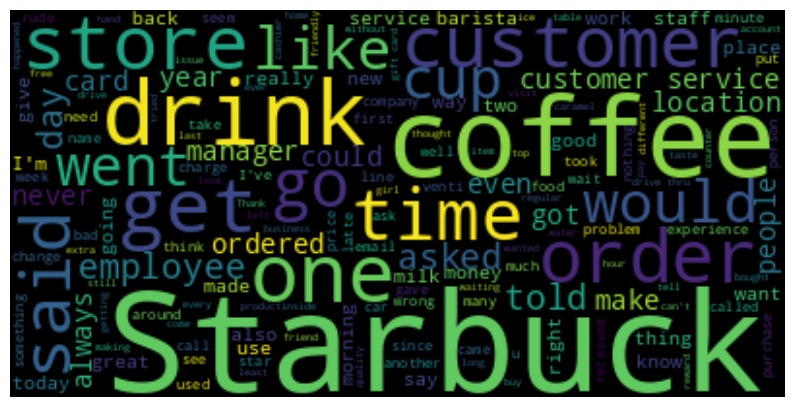

In [14]:
text = " ".join(i for i in df.Review)
# stopwords = set(stopwords)
wordcloud = WordCloud(stopwords= set(stopwords.words('english')) , background_color="black").generate(text)
plt.figure( figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Word Cloud for Raw text

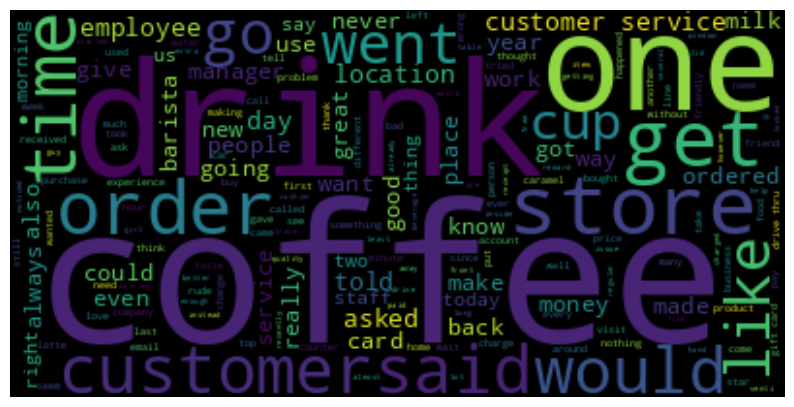

In [15]:
text = " ".join(i for i in df.clean_Review)
# stopwords = set(stopwords)
wordcloud = WordCloud(stopwords=set(stopwords.words('english')), background_color="black").generate(text)
plt.figure( figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Yet Another Keyword Extractor (Yake)

https://github.com/LIAAD/yake

In [16]:
# importing libraries
!pip install yake
import yake
from yake.highlight import TextHighlighter

Trying implementation of YAKE

In [17]:
# initilization
kw_extractor = yake.KeywordExtractor()

# implementations
keywords = kw_extractor.extract_keywords(df['clean_Review'][0])

In [18]:
print('Print Orignal Text:', df['clean_Review'][0], end= '\n')
print('Print Keywords:')
keywords #The lower the score, the more relevant the keyword is.

Print Orignal Text: amber and ladonna at the on southwest parkway are always so warm and welcoming there is always smile in their voice when they greet you at the drive thru and their customer service is always spot on they always get my order right and with smile would actually give them more than stars if they were available
Print Keywords:


[('amber and ladonna', 0.008283183325509355),
 ('southwest parkway', 0.011575587158207038),
 ('warm and welcoming', 0.011575587158207038),
 ('customer service', 0.011575587158207038),
 ('smile', 0.06465382239532108),
 ('amber', 0.07679667280280811),
 ('ladonna', 0.10697254906238414),
 ('southwest', 0.10697254906238414),
 ('parkway', 0.10697254906238414),
 ('warm', 0.10697254906238414),
 ('welcoming', 0.10697254906238414),
 ('voice', 0.10697254906238414),
 ('greet', 0.10697254906238414),
 ('drive', 0.10697254906238414),
 ('customer', 0.10697254906238414),
 ('service', 0.10697254906238414),
 ('spot', 0.10697254906238414),
 ('order', 0.10697254906238414),
 ('give', 0.10697254906238414),
 ('stars', 0.10697254906238414)]

Adding parameters to the YAKE function

In [19]:
# resulting into unigram and top 7 words
kw_extractor = yake.KeywordExtractor(n = 1, top = 7, stopwords= None)
keywords = kw_extractor.extract_keywords(df['clean_Review'][0])

In [20]:
print('Print Orignal Text:', df['clean_Review'][0], end= '\n')
print('Print Keywords:')
keywords

Print Orignal Text: amber and ladonna at the on southwest parkway are always so warm and welcoming there is always smile in their voice when they greet you at the drive thru and their customer service is always spot on they always get my order right and with smile would actually give them more than stars if they were available
Print Keywords:


[('smile', 0.06465382239532108),
 ('amber', 0.07679667280280811),
 ('ladonna', 0.10697254906238414),
 ('southwest', 0.10697254906238414),
 ('parkway', 0.10697254906238414),
 ('warm', 0.10697254906238414),
 ('welcoming', 0.10697254906238414)]

In [21]:
# trying Highlighter function from yake library
th = TextHighlighter(max_ngram_size = 2)
th.highlight(df['clean_Review'][0], keywords)

'<kw>amber</kw> and <kw>ladonna</kw> at the on <kw>southwest</kw> <kw>parkway</kw> are always so <kw>warm</kw> and <kw>welcoming</kw> there is always <kw>smile</kw> in their voice when they greet you at the drive thru and their customer service is always spot on they always get my order right and with <kw>smile</kw> would actually give them more than stars if they were available'

In [22]:
# Defining the fuction for txtracting the top 5 keywords

def yake_keyword_extract(text):
  kw_extractor = yake.KeywordExtractor(n = 1, top = 5)
  keys = kw_extractor.extract_keywords(text)
  return [i[0] for i in keys]

In [23]:
# applying the function to the column
df['clean_Review'].apply(yake_keyword_extract)

0        [smile, amber, ladonna, southwest, parkway]
1                [make, drink, great, store, drinks]
2             [location, order, make, place, wanted]
3                   [card, work, paid, drinks, made]
4                [water, kick, drinking, cups, warm]
                           ...                      
808                [debit, card, long, company, put]
809              [back, mug, bought, thermos, month]
810    [coffee, counter, regular, customer, ordered]
811          [cream, whipped, made, ordered, drinks]
812            [demanded, tips, made, wait, coffees]
Name: clean_Review, Length: 813, dtype: object

In [24]:
# Creating the dataframe, with top 5 kwywords from text
df_keys = pd.DataFrame(df['clean_Review'].apply(lambda x: pd.Series(yake_keyword_extract(x))))
df_keys.columns= ['yake_keyword_{}'.format(i) for i in range(1,6)]

In [25]:
# creating the dataframe wo showcase the results
df = pd.concat([df, df_keys], axis = 1)
df.head()

,name,Rating,Review,clean_Review,length_of_review,length_of_clean_review,yake_keyword_1,yake_keyword_2,yake_keyword_3,yake_keyword_4,yake_keyword_5
0,Helen,5.0,Amber and LaDonna at the Starbucks on Southwes...,amber and ladonna at the on southwest parkway ...,60,57,smile,amber,ladonna,southwest,parkway
1,Courtney,5.0,** at the Starbucks by the fire station on 436...,at the by the fire station on in altamonte spr...,105,100,make,drink,great,store,drinks
2,Daynelle,5.0,I just wanted to go out of my way to recognize...,just wanted to go out of my way to recognize e...,72,62,location,order,make,place,wanted
3,Taylor,5.0,Me and my friend were at Starbucks and my card...,me and my friend were at and my card did not w...,86,83,card,work,paid,drinks,made
4,Tenessa,5.0,I’m on this kick of drinking 5 cups of warm wa...,am on this kick of drinking cups of warm water...,74,67,water,kick,drinking,cups,warm


In [26]:
# Looking at the keywords present in the 1st column
df['yake_keyword_1'].value_counts()

yake_keyword_1
coffee         70
card           23
drink          22
customer       17
store          15
               ..
suggestions     1
atmosphere      1
policies        1
egift           1
demanded        1
Name: count, Length: 408, dtype: int64

In [27]:
# Looking at the keywords present in the 2nd column
df['yake_keyword_2'].value_counts()

yake_keyword_2
coffee      37
service     16
customer    14
store       13
time        12
            ..
checked      1
jenn         1
sudbury      1
sausage      1
tips         1
Name: count, Length: 470, dtype: int64

# KeyBERT

https://maartengr.github.io/KeyBERT/api/keybert.html

In [28]:
# importing libraries
!pip install keybert
from keybert import KeyBERT
from tqdm.autonotebook import tqdm, trange

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [29]:
# model initilization
kw_model = KeyBERT()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [30]:
# extracting unigram and bigram from the text
keywords_1_2 = kw_model.extract_keywords(df['clean_Review'][0], keyphrase_ngram_range=(1, 2),stop_words= 'english', top_n= 10)
keywords_1_2

[('amber ladonna', 0.5816),
 ('amber', 0.4975),
 ('welcoming smile', 0.4366),
 ('ladonna southwest', 0.4218),
 ('greet drive', 0.3927),
 ('ladonna', 0.379),
 ('stars available', 0.3607),
 ('stars', 0.3598),
 ('parkway warm', 0.3571),
 ('voice greet', 0.3564)]

In [31]:
# extracting unigrams from text
keywords_1_1 = kw_model.extract_keywords(df['clean_Review'][0], keyphrase_ngram_range=(1, 1),stop_words= 'english', top_n= 10)
keywords_1_1

[('amber', 0.4975),
 ('ladonna', 0.379),
 ('stars', 0.3598),
 ('welcoming', 0.3291),
 ('greet', 0.3284),
 ('smile', 0.3211),
 ('southwest', 0.3187),
 ('parkway', 0.2731),
 ('order', 0.2681),
 ('customer', 0.243)]

In [32]:
# Defining the fuction for txtracting the top 5 keywords
bert_key_model = KeyBERT()

def bertkey_keyword_extract(text):
  bertkey_extract = bert_key_model.extract_keywords(text, keyphrase_ngram_range=(1, 1), stop_words= 'english', top_n= 5)
  return [i[0] for i in bertkey_extract]

In [33]:
# applying the function to the column
df['clean_Review'].apply(bertkey_keyword_extract)

0         [amber, ladonna, stars, welcoming, greet]
1        [drinks, baristas, drink, fl, experiences]
2          [billy, order, employee, franklin, park]
3       [card, kindness, drinks, support, thankful]
4             [coffee, cups, water, drinking, free]
                           ...                     
808            [debit, nsf, card, account, portion]
809            [mug, thermos, split, bought, shiny]
810    [latte, coffee, customer, employee, coffees]
811    [whipped, frappacino, cream, venti, ordered]
812         [tips, coffees, store, melted, demands]
Name: clean_Review, Length: 813, dtype: object

In [34]:
%%time
# Creating the dataframe, with top 5 kwywords from text
df_bertkey_keys = pd.DataFrame(df['clean_Review'].apply(lambda x: pd.Series(bertkey_keyword_extract(x))))
df_bertkey_keys.columns= ['bertkey_keyword_{}'.format(i) for i in range(1,6)]

CPU times: user 2min 24s, sys: 49 s, total: 3min 13s
Wall time: 2min 22s


In [35]:
# preparing the final result dataset
df = pd.concat([df, df_bertkey_keys], axis = 1)
df.head()

,name,Rating,Review,clean_Review,length_of_review,length_of_clean_review,yake_keyword_1,yake_keyword_2,yake_keyword_3,yake_keyword_4,yake_keyword_5,bertkey_keyword_1,bertkey_keyword_2,bertkey_keyword_3,bertkey_keyword_4,bertkey_keyword_5
0,Helen,5.0,Amber and LaDonna at the Starbucks on Southwes...,amber and ladonna at the on southwest parkway ...,60,57,smile,amber,ladonna,southwest,parkway,amber,ladonna,stars,welcoming,greet
1,Courtney,5.0,** at the Starbucks by the fire station on 436...,at the by the fire station on in altamonte spr...,105,100,make,drink,great,store,drinks,drinks,baristas,drink,fl,experiences
2,Daynelle,5.0,I just wanted to go out of my way to recognize...,just wanted to go out of my way to recognize e...,72,62,location,order,make,place,wanted,billy,order,employee,franklin,park
3,Taylor,5.0,Me and my friend were at Starbucks and my card...,me and my friend were at and my card did not w...,86,83,card,work,paid,drinks,made,card,kindness,drinks,support,thankful
4,Tenessa,5.0,I’m on this kick of drinking 5 cups of warm wa...,am on this kick of drinking cups of warm water...,74,67,water,kick,drinking,cups,warm,coffee,cups,water,drinking,free


In [36]:
df['clean_Review'][0]

'amber and ladonna at the on southwest parkway are always so warm and welcoming there is always smile in their voice when they greet you at the drive thru and their customer service is always spot on they always get my order right and with smile would actually give them more than stars if they were available'

In [37]:
# extracting keywords from 1st columns
df['bertkey_keyword_1'].value_counts()

bertkey_keyword_1
coffee       114
customer      26
customers     21
latte         21
caramel       15
            ... 
foods          1
texas          1
biscayne       1
sudbury        1
tips           1
Name: count, Length: 375, dtype: int64

In [38]:
# extracting keywords from 2nd columns
df['bertkey_keyword_2'].value_counts()

bertkey_keyword_2
coffee          61
customer        39
customers       20
card            15
drinks          11
                ..
delicious        1
refrigerator     1
florida          1
giftcard         1
frappacino       1
Name: count, Length: 411, dtype: int64

# Keyword Extraction using IF-IDF

In [39]:
# preprocessing, which includes the porter stemmer
stemmer = PorterStemmer()

def text_preprocessing_tfidf(text):
  text = contractions.fix(text) # converting can't to cannot
  text = re.sub(r'@\w+', '', text) # removing the @apple
  text = re.sub(r'http\S+', '', text) # removing the http
  text = re.sub(r"[^a-zA-Z]", " ", text) # removing the numbers
  text = text.lower().strip()
  text = word_tokenize(text)
  text = [stemmer.stem(w) for w in text if not w in stopwords.words('english')]
  text = [token for token in text if len(token) >= 2]
  text = [token for token in text if token not in ['starbucks', 'starbuck']] # removing the starbucks word from analysis
  text = ' '.join(text)
  return text

In [40]:
# implementing pre-preprocessing
df['review_tfidf'] = df['Review'].apply(text_preprocessing_tfidf)

In [41]:
# implemeting tfidfvectorizer
vectorizer = TfidfVectorizer(lowercase = True,  stop_words = 'english', ngram_range = (1,1), min_df = 2, token_pattern=r'\b[a-zA-Z]+\b')
X = vectorizer.fit_transform(df["Review"])

In [42]:
# X.toarray()

In [43]:
# featuure names
vectorizer.get_feature_names_out()

array(['able', 'absolute', 'absolutely', ..., 'yrs', 'yummy', 'zero'],
      dtype=object)

In [44]:
# Creating the vector dataset
df_tfidf = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())
df_tfidf.head()

able  absolute  absolutely   ac  accept  acceptable  accepted  accepting  \
0   0.0       0.0         0.0  0.0     0.0         0.0       0.0        0.0   
1   0.0       0.0         0.0  0.0     0.0         0.0       0.0        0.0   
2   0.0       0.0         0.0  0.0     0.0         0.0       0.0        0.0   
3   0.0       0.0         0.0  0.0     0.0         0.0       0.0        0.0   
4   0.0       0.0         0.0  0.0     0.0         0.0       0.0        0.0   

   access  accident  accidentally  accommodate  according  account  accounts  \
0     0.0       0.0           0.0          0.0        0.0      0.0       0.0   
1     0.0       0.0           0.0          0.0        0.0      0.0       0.0   
2     0.0       0.0           0.0          0.0        0.0      0.0       0.0   
3     0.0       0.0           0.0          0.0        0.0      0.0       0.0   
4     0.0       0.0           0.0          0.0        0.0      0.0       0.0   

   acct  accused  ache  achieve  acknowledge  acknowledged  act  acted  \
0   0.0      0.0   0.0      0.0          0.0           0.0  0.0    0.0   
1   0.0      0.0   0.0      0.0          0.0           0.0  0.0    0.0   
2   0.0      0.0   0.0      0.0          0.0           0.0  0.0    0.0   
3   0.0      0.0   0.0      0.0          0.0           0.0  0.0    0.0   
4   0.0      0.0   0.0      0.0          0.0           0.0  0.0    0.0   

   acting  action  actions  activate  activities  actual  actually   ad  add  \
0     0.0     0.0      0.0       0.0         0.0     0.0   0.23342  0.0  0.0   
1     0.0     0.0      0.0       0.0         0.0     0.0   0.00000  0.0  0.0   
2     0.0     0.0      0.0       0.0         0.0     0.0   0.00000  0.0  0.0   
3     0.0     0.0      0.0       0.0         0.0     0.0   0.00000  0.0  0.0   
4     0.0     0.0      0.0       0.0         0.0     0.0   0.00000  0.0  0.0   

   added  addicted  adding  addition  additional  address  addressed  adjust  \
0    0.0       0.0     0.0       0.0         0.0      0.0        0.0     0.0   
1    0.0       0.0     0.0       0.0         0.0      0.0        0.0     0.0   
2    0.0       0.0     0.0       0.0         0.0      0.0        0.0     0.0   
3    0.0       0.0     0.0       0.0         0.0      0.0        0.0     0.0   
4    0.0       0.0     0.0       0.0         0.0      0.0        0.0     0.0   

   adore  adult  advance  advantage  advertised  advise  advised  affected  \
0    0.0    0.0      0.0        0.0         0.0     0.0      0.0       0.0   
1    0.0    0.0      0.0        0.0         0.0     0.0      0.0       0.0   
2    0.0    0.0      0.0        0.0         0.0     0.0      0.0       0.0   
3    0.0    0.0      0.0        0.0         0.0     0.0      0.0       0.0   
4    0.0    0.0      0.0        0.0         0.0     0.0      0.0       0.0   

   afford  afternoon  age  agent  ago  agree  agreed  ahead  aid  ain  air  \
0     0.0        0.0  0.0    0.0  0.0    0.0     0.0    0.0  0.0  0.0  0.0   
1     0.0        0.0  0.0    0.0  0.0    0.0     0.0    0.0  0.0  0.0  0.0   
2     0.0        0.0  0.0    0.0  0.0    0.0     0.0    0.0  0.0  0.0  0.0   
3     0.0        0.0  0.0    0.0  0.0    0.0     0.0    0.0  0.0  0.0  0.0   
4     0.0        0.0  0.0    0.0  0.0    0.0     0.0    0.0  0.0  0.0  0.0   

   airport  allergic  allergy  allow  allowed  almond  alternative  amazing  \
0      0.0       0.0      0.0    0.0      0.0     0.0          0.0      0.0   
1      0.0       0.0      0.0    0.0      0.0     0.0          0.0      0.0   
2      0.0       0.0      0.0    0.0      0.0     0.0          0.0      0.0   
3      0.0       0.0      0.0    0.0      0.0     0.0          0.0      0.0   
4      0.0       0.0      0.0    0.0      0.0     0.0          0.0      0.0   

   ambiance  american  americano  americans  amounts  angeles  angry  ann  \
0       0.0       0.0        0.0        0.0      0.0      0.0    0.0  0.0   
1       0.0       0.0        0.0        0.0      0.0      0.0    0.0  0.0

In [45]:
df_tfidf.shape

(813, 2549)

In [46]:
# Preparig the function, which extract the top 5 keywords which have maximum tfidf score
def extract(df):
  imp_keywords = []                         # list to store keywords
  for row in np.array(df):
    sorted_index = np.argsort(row)[-5:]     # identifying the index of words with maximum score
    # print(sorted_index)
    top_words = df.columns[sorted_index]    # extracting the top 5 words
    # print(top_words)
    imp_keywords.append(top_words.tolist()) # appending the keywords to the list
  return imp_keywords

In [47]:
# extracting the keywords and convert it inot dataframe
keywords_tfidf = pd.DataFrame(extract(df_tfidf), columns = ['keyword_tfidf_{}'.format(i) for i in range(1,6)])

# preparing final dataset
df = pd.concat([df, keywords_tfidf], axis = 1)
df.head()

,name,Rating,Review,clean_Review,length_of_review,length_of_clean_review,yake_keyword_1,yake_keyword_2,yake_keyword_3,yake_keyword_4,yake_keyword_5,bertkey_keyword_1,bertkey_keyword_2,bertkey_keyword_3,bertkey_keyword_4,bertkey_keyword_5,review_tfidf,keyword_tfidf_1,keyword_tfidf_2,keyword_tfidf_3,keyword_tfidf_4,keyword_tfidf_5
0,Helen,5.0,Amber and LaDonna at the Starbucks on Southwes...,amber and ladonna at the on southwest parkway ...,60,57,smile,amber,ladonna,southwest,parkway,amber,ladonna,stars,welcoming,greet,amber ladonna southwest parkway alway warm wel...,welcoming,spot,voice,greet,smile
1,Courtney,5.0,** at the Starbucks by the fire station on 436...,at the by the fire station on in altamonte spr...,105,100,make,drink,great,store,drinks,drinks,baristas,drink,fl,experiences,fire station altamont spring fl made day final...,station,refreshing,appreciated,make,great
2,Daynelle,5.0,I just wanted to go out of my way to recognize...,just wanted to go out of my way to recognize e...,72,62,location,order,make,place,wanted,billy,order,employee,franklin,park,want go way recogn employe billi franklin park...,running,seconds,franklin,location,make
3,Taylor,5.0,Me and my friend were at Starbucks and my card...,me and my friend were at and my card did not w...,86,83,card,work,paid,drinks,made,card,kindness,drinks,support,thankful,friend card work thank worker paid drink nice ...,card,drinks,work,paid,didn
4,Tenessa,5.0,I’m on this kick of drinking 5 cups of warm wa...,am on this kick of drinking cups of warm water...,74,67,water,kick,drinking,cups,warm,coffee,cups,water,drinking,free,kick drink cup warm water work instacart right...,super,professional,fully,opportunity,water


# Hugging Face Emotion Detection

https://huggingface.co/mrm8488/t5-base-finetuned-emotion

In [48]:
# importing the required libraries
from transformers import AutoTokenizer, AutoModelWithLMHead

In [49]:
df['clean_Review'][0]

'amber and ladonna at the on southwest parkway are always so warm and welcoming there is always smile in their voice when they greet you at the drive thru and their customer service is always spot on they always get my order right and with smile would actually give them more than stars if they were available'

In [50]:
# importing tokenizer method
tokenizer = AutoTokenizer.from_pretrained("mrm8488/t5-base-finetuned-emotion")

# importing model
model_emotion = AutoModelWithLMHead.from_pretrained("mrm8488/t5-base-finetuned-emotion")

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [51]:
# writing the function to extract emotions from text
def get_emotion(text):
  input_ids = tokenizer.encode(text + '</s>', return_tensors='pt')

  output = model_emotion.generate(input_ids=input_ids, max_length=2)

  dec = [tokenizer.decode(ids) for ids in output]

  label = dec[0]

  return label.split()[1]

In [52]:
# taking sample
print(df['clean_Review'][16])
get_emotion(df['clean_Review'][16])

was handed coffee in drive through the lid was not on right and the top edge of the cup was bent when accepted the coffee and was going to place it in my cup holder the cup bent the lid fell off and the coffee spilled all over myself and my newly detailed interior not the way to start day especially on the way to an appointment now for coffee and detailing


'anger'

In [53]:
%%time
#8 mins
# implementing the function
df['Emotions_Bert'] = df['clean_Review'].apply(get_emotion)

CPU times: user 6min 59s, sys: 729 ms, total: 7min
Wall time: 7min 2s


In [54]:
df.sample(2)

,name,Rating,Review,clean_Review,length_of_review,length_of_clean_review,yake_keyword_1,yake_keyword_2,yake_keyword_3,yake_keyword_4,yake_keyword_5,bertkey_keyword_1,bertkey_keyword_2,bertkey_keyword_3,bertkey_keyword_4,bertkey_keyword_5,review_tfidf,keyword_tfidf_1,keyword_tfidf_2,keyword_tfidf_3,keyword_tfidf_4,keyword_tfidf_5,Emotions_Bert
589,Kelly,1.0,According to the Americans with Disabilities A...,according to the americans with disabilities a...,126,113,service,animal,dog,bring,told,discrimination,sacramento,disabilities,california,animal,accord american disabl act allow bring servic ...,vehicles,bring,service,d,dog,anger
485,Claudia,1.0,"In early May, in front of a co-worker, I was g...",in early may in front of co worker was going t...,101,95,pain,front,worker,metal,straw,straw,gum,tooth,gums,pain,earli may front co worker go take sip metal st...,gums,right,worker,straw,pain,sadness


In [55]:
df['Emotions_Bert'].value_counts()

Emotions_Bert
anger       425
joy         240
sadness      80
fear         32
love         30
surprise      6
Name: count, dtype: int64

In [56]:
df[df['Emotions_Bert']=='surprise']['clean_Review'][497]

'was now in your branch in soliman abaza street with lady and man serving and asked for mango cheese cake and was shocked that they throwing the service to each other and after paid no one brought me it and the man swore that he will not bring it was really shocked with such disgusting service'

In [57]:
df[df['Emotions_Bert']=='anger']['clean_Review'][804]

'for the past several years have stopped in to in the afternoon for cup of dark roast coffee few weeks ago was told that no longer brews dark roast coffee after corporate wide decision the young woman behind the counter told me that had decided coffee drinkers did not need the extra boost of dark roast in the afternoon and that the pike peak brew would be sufficient since when did decide they could dictate what roast want or need in the afternoon sorry but prefer dark roast and will now look to other coffeehouses to satisfy my afternoon fix'

<Axes: xlabel='Emotions_Bert', ylabel='Rating'>

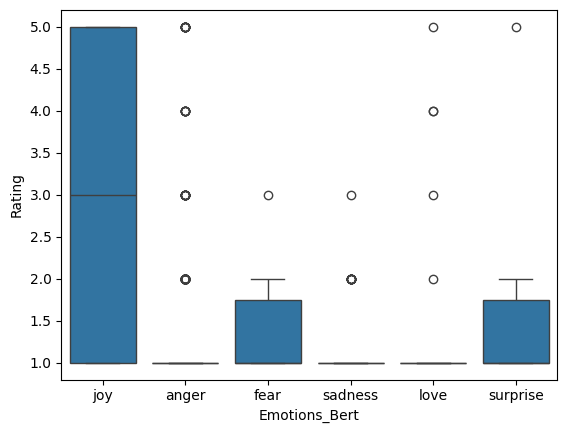

In [58]:
# box plot foir the comparision of emotion and rating

sns.boxplot(data = df, y = 'Rating', x = 'Emotions_Bert')

# Observations

## WordCloud according to emotions

In [59]:
# Distribution of emotions
df['Emotions_Bert'].value_counts(normalize = True)*100

Emotions_Bert
anger       52.275523
joy         29.520295
sadness      9.840098
fear         3.936039
love         3.690037
surprise     0.738007
Name: proportion, dtype: float64

In [60]:
# most common words observed
stopwords_for_wordcloud = ['coffee', 'customer', 'customers']

In [61]:
# taking out the required columns
keyword_columns = ['yake_keyword_1', 'yake_keyword_2', 'yake_keyword_3', 'yake_keyword_4', 'yake_keyword_5', 'bertkey_keyword_1', 'bertkey_keyword_2', 'bertkey_keyword_3',
                    'bertkey_keyword_4', 'bertkey_keyword_5', 'keyword_tfidf_1', 'keyword_tfidf_2', 'keyword_tfidf_3', 'keyword_tfidf_4', 'keyword_tfidf_5']

# converting emotions into list
emotions_list = list(df['Emotions_Bert'].unique())

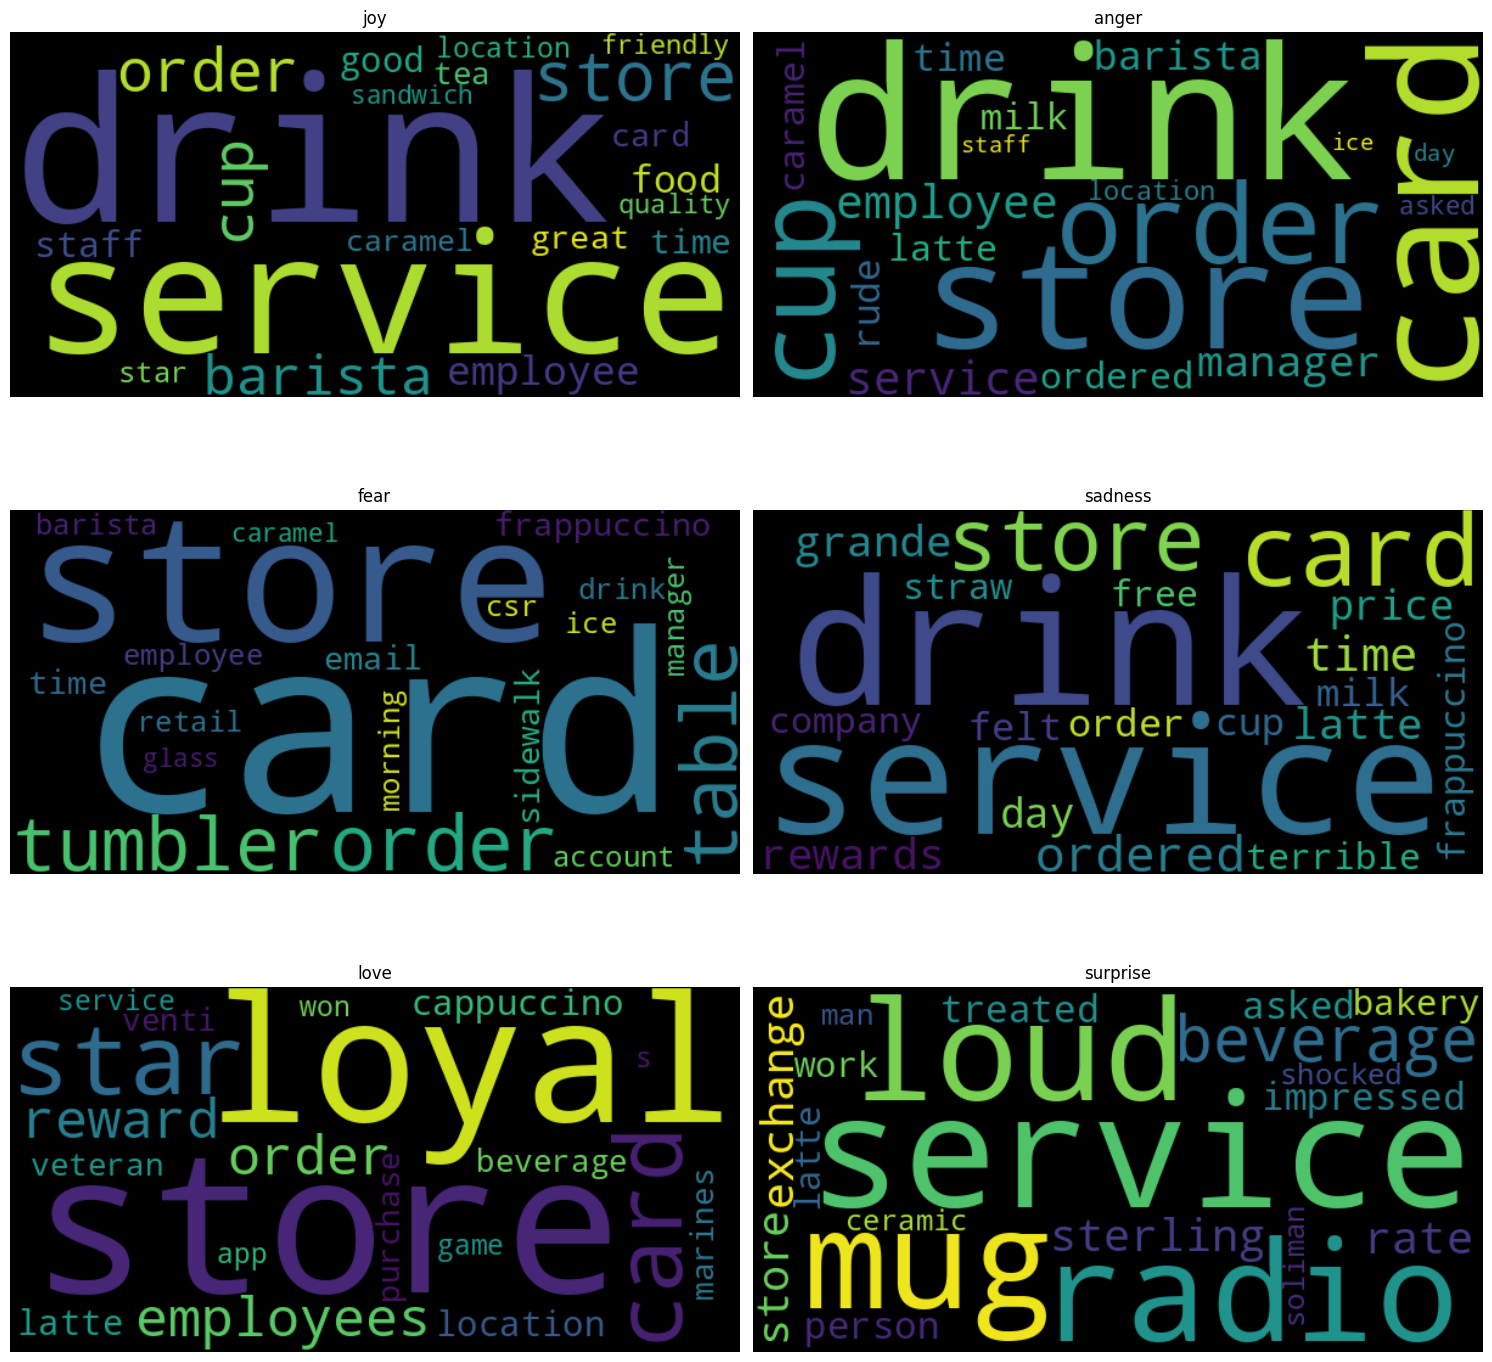

In [62]:
# plottting the subplots for each emotions
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

axes = axes.flatten() # Flatten the axes array for easy iteration

for idx, i in enumerate(emotions_list):
    # Extract the relevant data
    master_list = df[df['Emotions_Bert'] == i][keyword_columns].values.tolist()
    text = ' '.join([str(item) for sublist in master_list for item in sublist if isinstance(item, str)])

    # Create the word cloud
    wordcloud = WordCloud(stopwords=stopwords_for_wordcloud, width=600, height=300, min_font_size=10, max_words=20, background_color='black').generate(text)

    # Plot the word cloud in the respective subplot
    axes[idx].imshow(wordcloud, interpolation='bilinear')
    axes[idx].set_title(i)
    axes[idx].axis('off')


for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and show plot
plt.tight_layout(pad=1.0)
plt.show()

## WordCloud for YAKE

In [63]:
# taking out the required columns
keyword_columns_yake = ['yake_keyword_1', 'yake_keyword_2', 'yake_keyword_3', 'yake_keyword_4', 'yake_keyword_5']

In [64]:
# converting the column observations into the list
master_list = df[keyword_columns_yake].values.tolist()
text = ' '.join([str(item) for sublist in master_list for item in sublist if isinstance(item, str)])

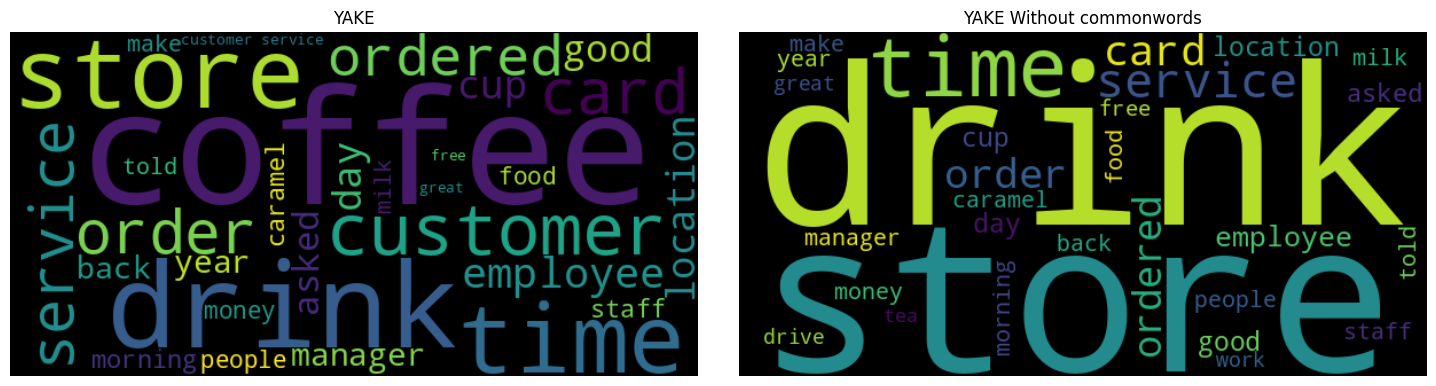

In [65]:
# wordcloud plotting
wordcloud_with_stopwords = WordCloud(width=600, height=300, min_font_size=10, max_words=30, background_color='black').generate(text)
wordcloud_without_stopwords = WordCloud(stopwords=stopwords_for_wordcloud, width=600, height=300, min_font_size=10, max_words=30, background_color='black').generate(text)

# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# Plot the word clouds
ax[0].imshow(wordcloud_with_stopwords, interpolation='bilinear')
ax[0].set_title('YAKE')
ax[0].axis('off')

ax[1].imshow(wordcloud_without_stopwords, interpolation='bilinear')
ax[1].set_title('YAKE Without commonwords')
ax[1].axis('off')

# Adjust layout to add padding between subplots
plt.tight_layout(pad=3.0)
plt.show()

## WordCloud for keyBERT

In [66]:
# taking out the required columns
keyword_columns_keybert = ['bertkey_keyword_1', 'bertkey_keyword_2', 'bertkey_keyword_3','bertkey_keyword_4', 'bertkey_keyword_5']

In [67]:
# converting the columns into list
master_list = df[keyword_columns_keybert].values.tolist()
text = ' '.join([str(item) for sublist in master_list for item in sublist if isinstance(item, str)])

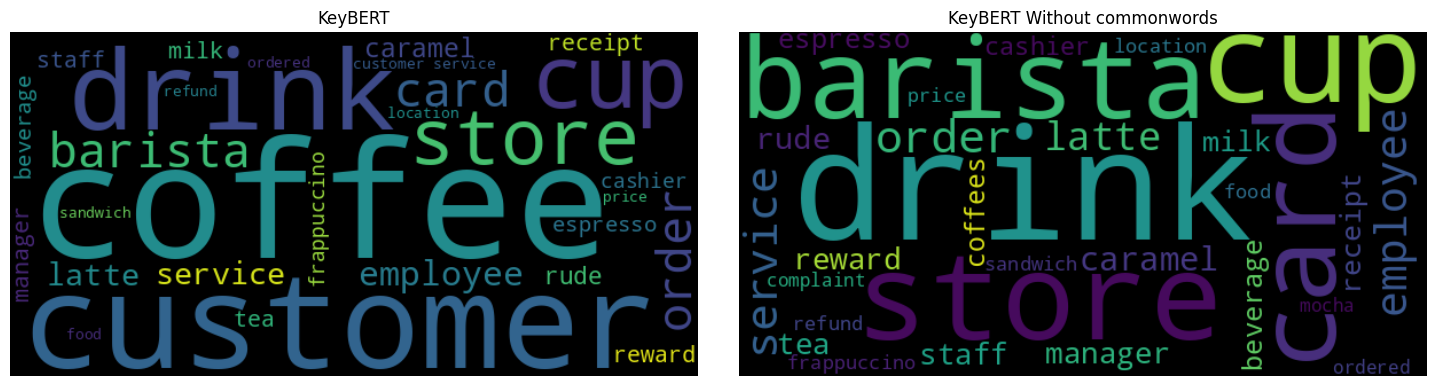

In [68]:
# wordcloud for the bertkey
wordcloud_with_stopwords = WordCloud(width=600, height=300, min_font_size=10, max_words=30, background_color='black').generate(text)
wordcloud_without_stopwords = WordCloud(stopwords=stopwords_for_wordcloud, width=600, height=300, min_font_size=10, max_words=30, background_color='black').generate(text)

# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# Plot the word clouds
ax[0].imshow(wordcloud_with_stopwords, interpolation='bilinear')
ax[0].set_title('KeyBERT')
ax[0].axis('off')

ax[1].imshow(wordcloud_without_stopwords, interpolation='bilinear')
ax[1].set_title('KeyBERT Without commonwords')
ax[1].axis('off')

# Adjust layout to add padding between subplots
plt.tight_layout(pad=3.0)
plt.show()

## WordCloud for TFIDF

In [69]:
# taking out the required columns
keyword_columns_tfidf = ['keyword_tfidf_1', 'keyword_tfidf_2', 'keyword_tfidf_3','keyword_tfidf_4', 'keyword_tfidf_5']

In [70]:
# selecting the required columns
master_list = df[keyword_columns_tfidf].values.tolist()
text = ' '.join([str(item) for sublist in master_list for item in sublist if isinstance(item, str)])

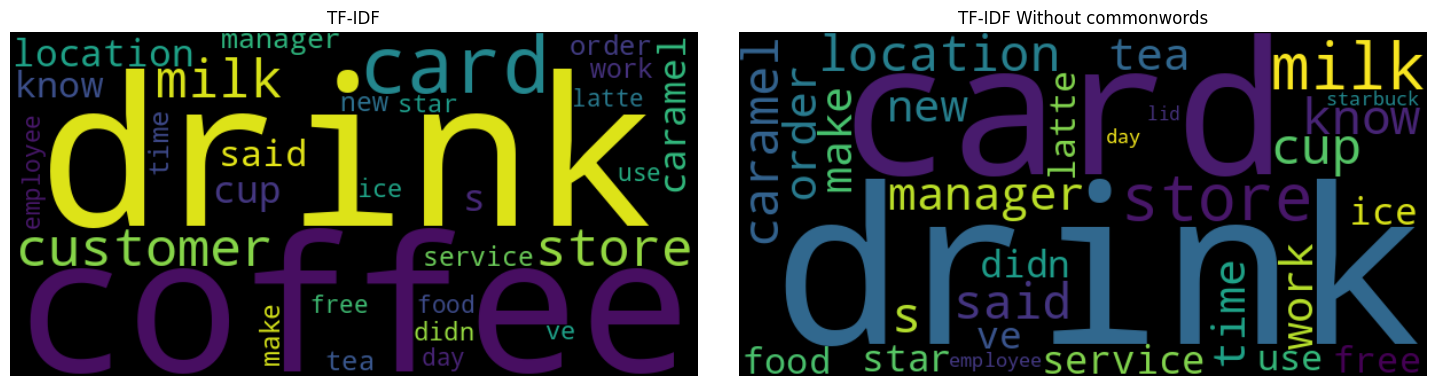

In [71]:
wordcloud_with_stopwords = WordCloud(width=600, height=300, min_font_size=10, max_words=30, background_color='black').generate(text)
wordcloud_without_stopwords = WordCloud(stopwords=stopwords_for_wordcloud, width=600, height=300, min_font_size=10, max_words=30, background_color='black').generate(text)

# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# Plot the word clouds
ax[0].imshow(wordcloud_with_stopwords, interpolation='bilinear')
ax[0].set_title('TF-IDF')
ax[0].axis('off')

ax[1].imshow(wordcloud_without_stopwords, interpolation='bilinear')
ax[1].set_title('TF-IDF Without commonwords')
ax[1].axis('off')

# Adjust layout to add padding between subplots
plt.tight_layout(pad=3.0)
plt.show()